# Visualizing Ligand Networks

When constructing a ligand network, it is very helpful to visualize it, both to quickly check that it makes sense and to allow rapid iteration of settings.

## Generate or load a Ligand Network

You will to create a `LigandNetwork` for your system of interest. For more information, see [Generating a Ligand Network](https://docs.openfree.energy/en/stable/cookbook/generate_ligand_network.html).

Briefly, to do this you can create a new network. Here we demonstrate how to do this for a minimum spanning network for a series of benzene modifications:

In [2]:
%matplotlib inline
from rdkit import Chem
import openfe

# load the ligands
supplier = Chem.SDMolSupplier("assets/somebenzenes.sdf", removeHs=False)
ligands = [openfe.SmallMoleculeComponent(mol) for mol in supplier]

# generate the network
ligand_network = openfe.ligand_network_planning.generate_minimal_spanning_network(
    ligands=ligands,
    mappers=[openfe.setup.KartografAtomMapper(map_hydrogens_on_hydrogens_only=True)],
    scorer=openfe.lomap_scorers.default_lomap_score,
)

Alternatively, you can load a ligand network that you have previously written to file (as a `.graphml`). Here we load the same benzene modification network under `assets/benzenes/ligand_network.graphml`:

In [4]:
with open("assets/benzenes/ligand_network.graphml") as f:
    graphml = f.read()

ligand_network = openfe.LigandNetwork.from_graphml(graphml)

## Visualize Network Topology

The topology of the network describes how the ligands are transformed into each other. The network itself forms a graph that can be visualized with the `plot_atommapping_network` function:

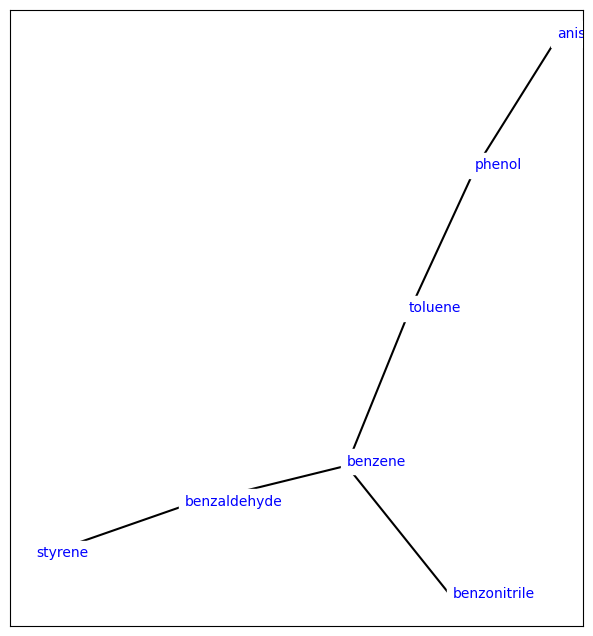

In [5]:
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(ligand_network)

## Visualizing Edges

The edges of the network each represent a single transformation. They include not only the identities of the two molecules being mutated between, but also the complete mapping between atoms in those molecules. 

Displaying an edge in the notebook will provide a 2D description of the atom mapping:

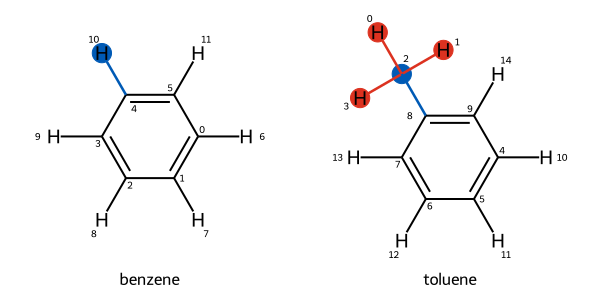

In [6]:
benzene_to_toluene = [
    edge for edge in ligand_network.edges 
    if {edge.componentA.name, edge.componentB.name} == {"benzene", "toluene"}
][0]

benzene_to_toluene

Atoms created or destroyed over the course of the transformation are highlighted in red, while atoms that are transformed are highlighted in blue.

An edge can also be visualized in 3D:

In [7]:
benzene_to_toluene.view_3d()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In the middle, both molecules are overlaid to demonstrate their 3D alignment. Each molecule is also depicted on its own on either side, with colored spheres indicating atoms that are mutated into each other. For instance, one of the benzene's hydrogen atoms is highlighted in the same color as the toluene's methyl carbon, indicating that this hydrogen mutates into the methyl carbon. Atoms without spheres vanish over the transformation, rather than being mutated into another atom.

## Visualizing Ligand Overlap

Sometimes it is helpful to visualize all the ligands together, for instance to inspect their alignment. This can be done with the `view_components_3d` function.

In [10]:
from openfe.utils.visualization_3D import view_components_3d

view_components_3d(ligand_network.nodes)

/Users/atravitz/micromamba/envs/openfe-notebooks/lib/python3.13/site-packages/openfe/utils/visualization_3D.py:140: DeprecationWarning: Use gufe.LigandAtomMapping.view_3d() instead.
  warnings.warn("Use gufe.LigandAtomMapping.view_3d() instead.", DeprecationWarning)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.